In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [5]:
# How many missing zeros are mising in each feature
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [6]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[feature_columns] = fill_values.fit_transform(df[feature_columns])

In [7]:
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [8]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [10]:
#Bagging Algorithms

In [11]:
#Bagging Decision Trees

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.832168   0.636364  0.757576    0.734266      0.764357
recall       0.788079   0.700000  0.757576    0.744040      0.757576
f1-score     0.809524   0.666667  0.757576    0.738095      0.760049
support    151.000000  80.000000  0.757576  231.000000    231.000000


In [13]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [14]:
#Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809211   0.645570  0.753247    0.727390      0.752538
recall       0.814570   0.637500  0.753247    0.726035      0.753247
f1-score     0.811881   0.641509  0.753247    0.726695      0.752878
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [16]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [19]:
#Boosting Algorithms 
#Ada Boost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.858726    0.778409  0.832402    0.818567      0.830607
recall       0.888252    0.728723  0.832402    0.808488      0.832402
f1-score     0.873239    0.752747  0.832402    0.812993      0.831056
support    349.000000  188.000000  0.832402  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.820000   0.654321  0.761905    0.737160      0.762622
recall       0.814570   0.662500  0.761905    0.738535      0.761905
f1-score     0.817276   0.658385  0.761905    0.737830      0.762249
support    151.000000  80.000000  0.761905  231.000000    231.000000


In [21]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [30]:
#Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.947368    0.960227  0.951583    0.953798      0.951870
recall       0.979943    0.898936  0.951583    0.939439      0.951583
f1-score     0.963380    0.928571  0.951583    0.945976      0.951194
support    349.000000  188.000000  0.951583  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816901   0.606742  0.735931    0.711821      0.744119
recall       0.768212   0.675000  0.735931    0.721606      0.735931
f1-score     0.791809   0.639053  0.735931    0.715431      0.738906
support    151.000000  80.000000  0.735931  231.000000    231.000000


In [25]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [26]:
#Ensemble Voting

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799511    0.828125  0.806331    0.813818      0.809529
recall       0.936963    0.563830  0.806331    0.750396      0.806331
f1-score     0.862797    0.670886  0.806331    0.766841      0.795610
support    349.000000  188.000000  0.806331  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[130  21]
 [ 37  43]]
ACCURACY SCORE:
0.7489
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.778443   0.671875  0.748918    0.725159      0.741536
recall       0.860927   0.537500  0.748918    0.699214      0.748918
f1-score     0.817610   0.597222  0.748918    0.707416      0.741285
support    151.000000  80.000000  0.748918  231.000000    231.000000


In [28]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

<AxesSubplot:>

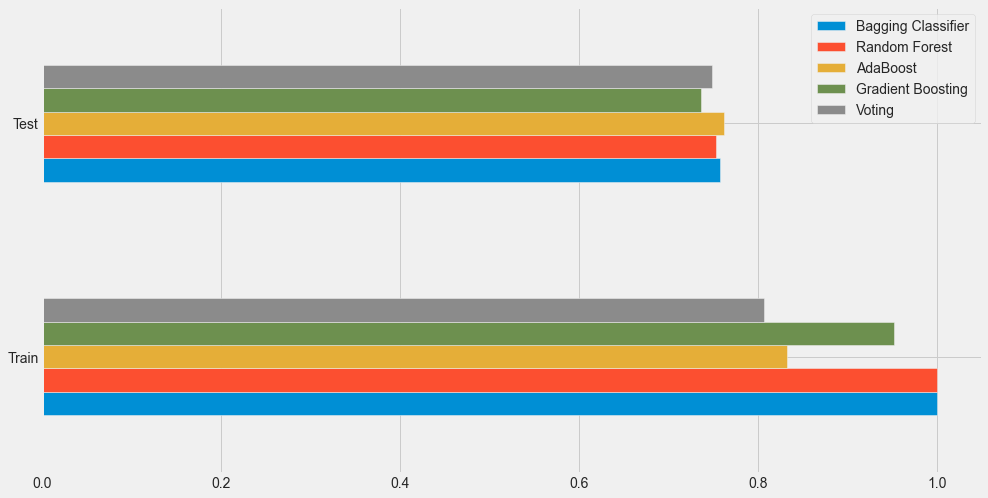

In [29]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))